In [1]:
import utils as Utils
from dqn_agent import DQN_Agent
from agent_handler import Agent_handler
from double_dqn_agent import Double_DQN_Agent
from dueling_dqn_agent import DuelingDQN_Agent
from assignment3_utils import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import gym

In [2]:
env = gym.make('PongDeterministic-v4', render_mode='rgb_array')

num_obs, num_actions = Utils.describe_env(env)

Observation space:  Box(0, 255, (210, 160, 3), uint8)
Observation space size:  (210, 160, 3)
Number of actions:  6


In [3]:
agents = []

batch = 8
update = 10
options = {
  "num_obs": (4, 84, 80, 1),
  "num_actions": num_actions,
  "update_rate": update,
  "learning_rate": 0.01,
  "discount_factor": 0.95,
  "exploration_factor": 1,
  "min_exploration_rate": 0.05,
  "exploration_decay": 0.995,
  "batch_size": batch,
  "name": f'{batch}_{update}'
}
agents.append(DQN_Agent(options))

batch = 16
update = 10
options = {
  "num_obs": (4, 84, 80, 1),
  "num_actions": num_actions,
  "update_rate": update,
  "learning_rate": 0.01,
  "discount_factor": 0.95,
  "exploration_factor": 1,
  "min_exploration_rate": 0.05,
  "exploration_decay": 0.995,
  "batch_size": batch,
  "name": f'{batch}_{update}'
}
agents.append(DQN_Agent(options))

batch = 8
update = 3
options = {
  "num_obs": (4, 84, 80, 1),
  "num_actions": num_actions,
  "update_rate": update,
  "learning_rate": 0.01,
  "discount_factor": 0.95,
  "exploration_factor": 1,
  "min_exploration_rate": 0.05,
  "exploration_decay": 0.995,
  "batch_size": batch,
  "name": f'{batch}_{update}'
}
agents.append(DQN_Agent(options))

batch = 16
update = 3
options = {
  "num_obs": (4, 84, 80, 1),
  "num_actions": num_actions,
  "update_rate": update,
  "learning_rate": 0.01,
  "discount_factor": 0.95,
  "exploration_factor": 1,
  "min_exploration_rate": 0.05,
  "exploration_decay": 0.995,
  "batch_size": batch,
  "name": f'{batch}_{update}'
}
agents.append(DQN_Agent(options))

In [4]:
handler = Agent_handler({
    "num_episodes":2000,
    "max_steps":500,
    "notify_percent":10,
    "skip": 15,
    "checkpoint_interval": 100,
    "crop": {
      "top": 30,
      "bottom": -12,
      "left": 0,
      "right": -1,
  }
})

In [5]:
results = handler.train(agents, env)

~~~ Training Agent: 8_10 1/4 ~~~
	Episode 0/2000 0%
	~~ CHECKPOINT ~~
	Episode 191/2000 10%
	~~ CHECKPOINT ~~
	~~ CHECKPOINT ~~
	Episode 391/2000 20%
	~~ CHECKPOINT ~~
	~~ CHECKPOINT ~~


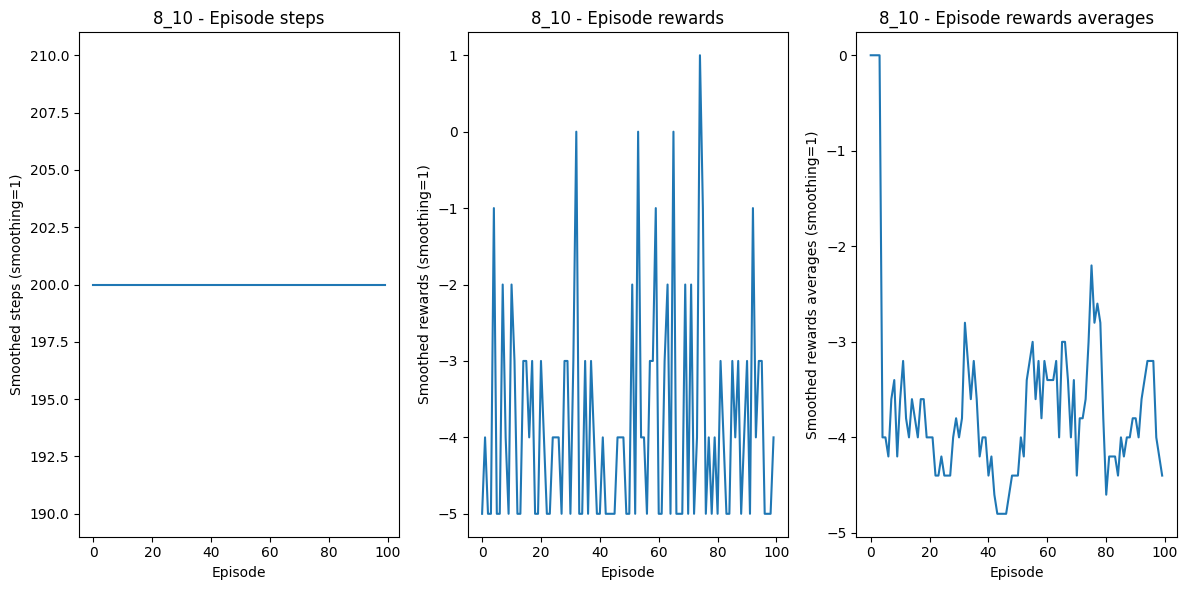

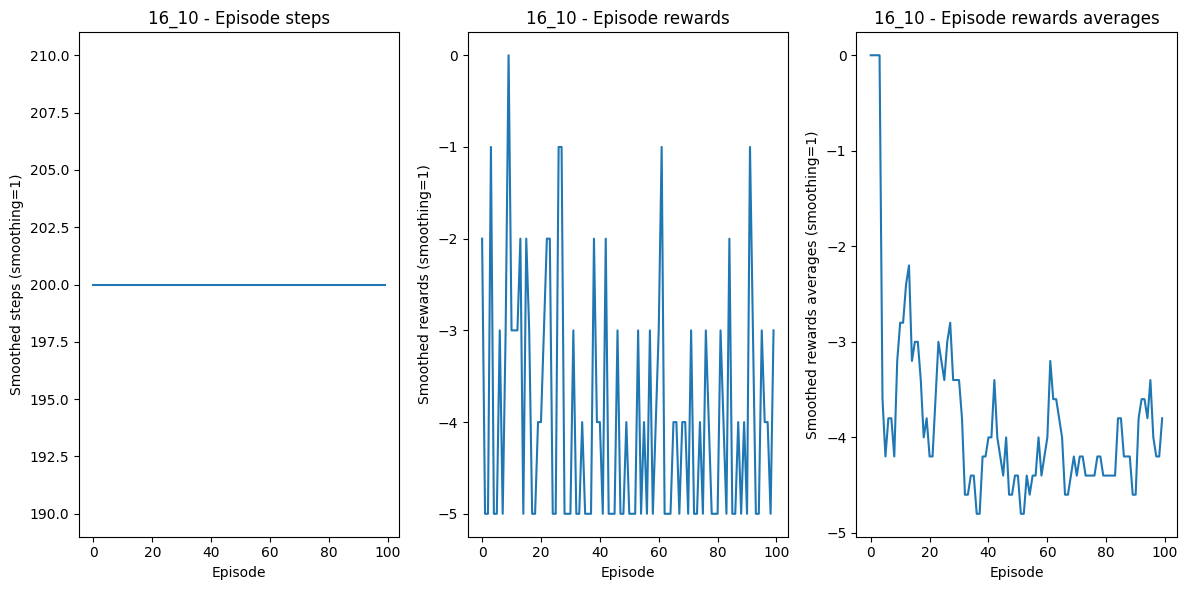

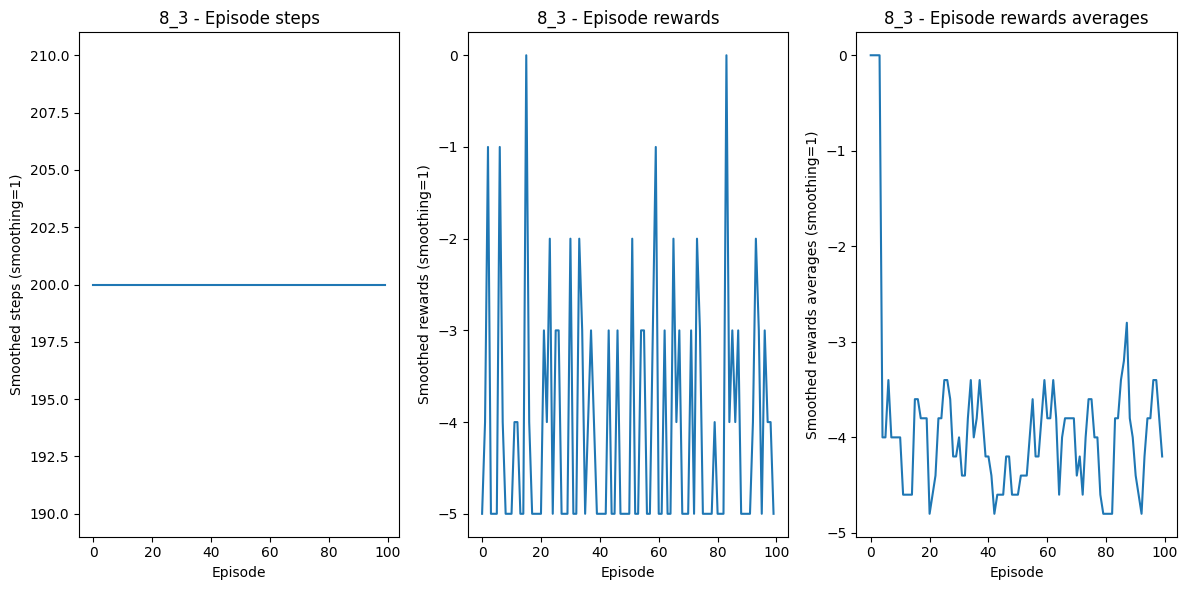

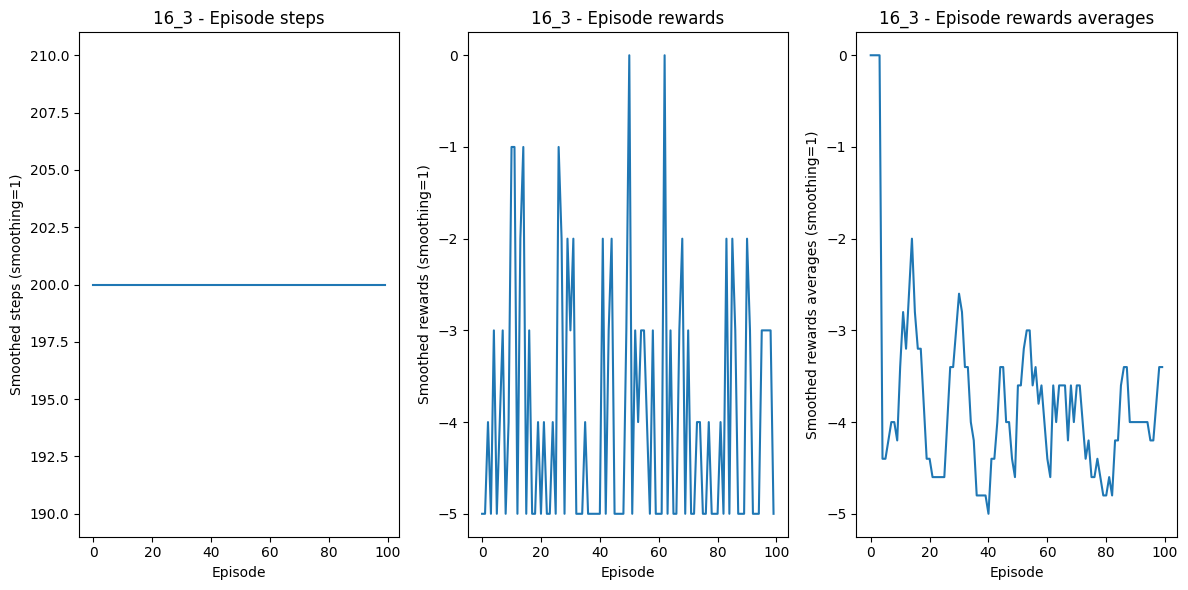

In [ ]:
for agent, result in results.items():
  moving_average = np.convolve(result["rewards"], np.ones(window_size)/window_size, mode='valid')

  padding = np.full(5 - 1, 0)
  result_array = np.concatenate([padding, moving_average])
  result["rewards averages"] = result_array
  Utils.plot_results(result, agent)